In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
x_train = x_train/255 # we divide x_train and test by 255 to increase the efficiency of our final output. 
x_test = x_test/255 # We scale the values. making it in 0 to 1 range.

In [34]:
len(x_train)

60000

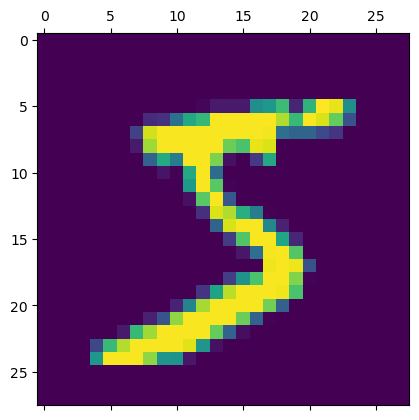

In [35]:
plt.matshow(x_train[0])

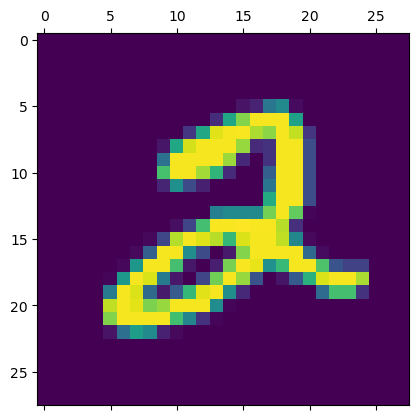

In [36]:
plt.matshow(x_train[5])

In [37]:
y_train[0]

5

In [38]:
y_train[5]

2

In [39]:
#we need to flatten the array of x to pass to neurons.

In [40]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_train_flat.shape   

(60000, 784)

In [41]:
x_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
x_test_flat = x_test.reshape(len(x_test), 28*28)
x_test_flat.shape 

(10000, 784)

In [43]:
# First we train our neural network without any hidden layer or dropout layer.

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape= (784,),activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "log/adam", histogram_freq = 1)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flat, y_train,epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 1s 362us/step - loss: 0.4730 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 1s 368us/step - loss: 0.3046 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 1s 347us/step - loss: 0.2833 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 1s 346us/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 346us/step - loss: 0.2667 - accuracy: 0.9257


In [45]:
model.evaluate(x_test_flat, y_test)    # 92.4 % efficiency achieved 

313/313 [==============================] - 0s 292us/step - loss: 0.2675 - accuracy: 0.9252


[0.26753416657447815, 0.9251999855041504]

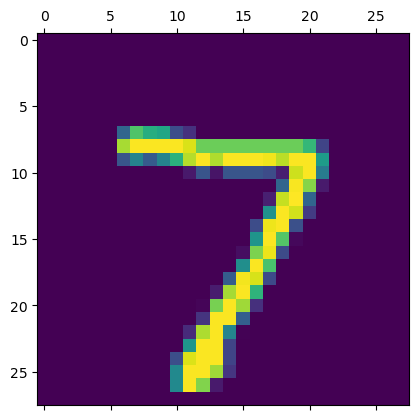

In [46]:
plt.matshow(x_test[0]) # it shows our first image.

In [47]:
y_pred = model.predict(x_test_flat)
y_pred[0] # this is our predicted number by our model

313/313 [==============================] - 0s 254us/step


array([2.2725327e-02, 4.0716597e-07, 4.8734125e-02, 9.4985259e-01,
       2.3951421e-03, 7.7047832e-02, 1.5950390e-06, 9.9980098e-01,
       8.5417688e-02, 6.6382015e-01], dtype=float32)

In [48]:
np.argmax(y_pred[0]) # this will give the maximum value of y_pred[0] - which is our predicted value for the given image.

7

In [49]:
y_pred_lables = [np.argmax(i) for i in y_pred]
y_pred_lables[0:5]

[7, 2, 1, 0, 4]

In [50]:
y_test[0:5]  #which matches with our y_pred.

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
# Now we are adding hidden layer and randomly dropout some of the neurons to get appropirate-fitting.

In [52]:

modeld = keras.Sequential([
    keras.layers.Dense(100,input_shape= (784,),activation = 'relu'), # Hidden layer
    keras.layers.Dropout(0.5),
    keras.layers.Dense(70,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(40,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense (10, activation = 'sigmoid')                 
                      
])
modeld.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
modeld.fit(x_train_flat, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 558us/step - loss: 1.7988 - accuracy: 0.3558
Epoch 2/5
1875/1875 [==============================] - 1s 536us/step - loss: 1.0807 - accuracy: 0.6336
Epoch 3/5
1875/1875 [==============================] - 1s 525us/step - loss: 0.8436 - accuracy: 0.7318
Epoch 4/5
1875/1875 [==============================] - 1s 522us/step - loss: 0.7135 - accuracy: 0.7832
Epoch 5/5
1875/1875 [==============================] - 1s 539us/step - loss: 0.6321 - accuracy: 0.8141


In [53]:
modeld.evaluate(x_test_flat, y_test) # 92.8 % efficiency achieved.

313/313 [==============================] - 0s 386us/step - loss: 0.2886 - accuracy: 0.9254


[0.2885890603065491, 0.9254000186920166]

In [54]:
y_pred = modeld.predict(x_test_flat)
y_pred[0]

313/313 [==============================] - 0s 354us/step


array([3.3823982e-01, 2.9258966e-01, 2.0680988e-02, 8.8473022e-01,
       4.2844471e-02, 2.7759872e-02, 3.4012330e-05, 9.9999917e-01,
       1.4915511e-02, 9.9968761e-01], dtype=float32)

In [55]:
np.argmax(y_pred[0])

7